# **Dardarin Regression Models with Random Forest**


---

## **1. Import libraries**

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## **2. Load the data set**

In [33]:
df = pd.read_csv('/content/dardarin_class_pIC50_pubchem_fp (1).csv')

In [34]:
df.isnull().any().any()

True

In [35]:
df.isnull().any()

PubchemFP0      False
PubchemFP1      False
PubchemFP2      False
PubchemFP3      False
PubchemFP4      False
                ...  
PubchemFP877     True
PubchemFP878     True
PubchemFP879     True
PubchemFP880     True
pIC50            True
Length: 882, dtype: bool

In [36]:
df = df.fillna(0)

## **3. Input features**
The **dardarin** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [37]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,1,1,0,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,1,1,1,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1,1,1,1,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1,1,1,1,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1,1,1,0,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1169,1,1,1,0,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1170,1,1,1,0,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1171,1,1,1,0,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### **3.2. Output features**

In [38]:
Y = df.pIC50
Y

0      4.88
1      7.80
2      7.89
3      8.11
4      8.22
       ... 
1168   7.52
1169   6.40
1170   7.13
1171   7.27
1172   0.00
Name: pIC50, Length: 1173, dtype: float64

### **3.3. Let's examine the data dimension**

In [39]:
X.shape

(1173, 881)

In [40]:
Y.shape

(1173,)

### **3.4. Remove low variance features**

In [41]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [42]:
X.shape

(1173, 114)

## **4. Data split (80/20 ratio)**

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [44]:
X_train.shape, Y_train.shape

((938, 114), (938,))

In [45]:
X_test.shape, Y_test.shape

((235, 114), (235,))

## **5. Building a Regression Model using Random Forest**

In [46]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5017233091117705

In [47]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(*args, **kw)>

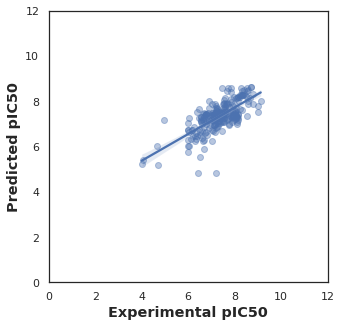

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# **Import Libraries**

In [49]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

# **Load the data set**

In [52]:
df = pd.read_csv('/content/dardarin_class_pIC50_pubchem_fp (1).csv')

In [53]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

# **Data pre-processing**

In [54]:
# Examine X dimension
X.shape

(1840, 881)

In [55]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(1840, 131)

In [56]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Compare ML algorithms**

In [57]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 93%|█████████▎| 39/42 [00:54<00:05,  1.79s/it]

[20:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:55<00:00,  1.32s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 93%|█████████▎| 39/42 [00:53<00:05,  1.79s/it]

[20:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:54<00:00,  1.29s/it]


In [58]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.83,0.85,0.35,1.44
DecisionTreeRegressor,0.83,0.85,0.35,0.04
ExtraTreeRegressor,0.83,0.85,0.35,0.06
GaussianProcessRegressor,0.83,0.85,0.35,0.80
RandomForestRegressor,0.79,0.81,0.39,1.47
BaggingRegressor,0.77,0.79,0.41,0.12
MLPRegressor,0.76,0.78,0.42,1.77
HistGradientBoostingRegressor,0.72,0.75,0.45,0.99
LGBMRegressor,0.72,0.75,0.45,0.20


In [59]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.12,0.44,0.63,1.06
HistGradientBoostingRegressor,0.07,0.40,0.65,0.54
LGBMRegressor,0.07,0.40,0.65,0.20
SVR,0.06,0.39,0.66,0.22
NuSVR,0.05,0.39,0.66,0.21
BaggingRegressor,0.03,0.38,0.67,0.12
KNeighborsRegressor,0.02,0.37,0.67,0.03
XGBRegressor,0.00,0.36,0.68,0.39
GradientBoostingRegressor,-0.01,0.35,0.68,0.50


# **Data visualization of model performance**

[(0.0, 1.0)]

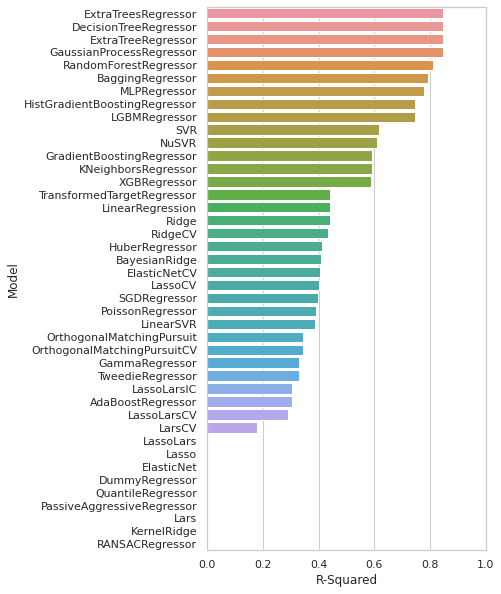

In [60]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

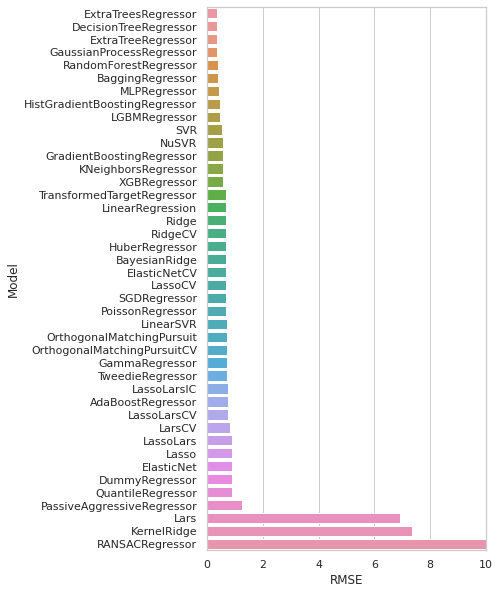

In [61]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

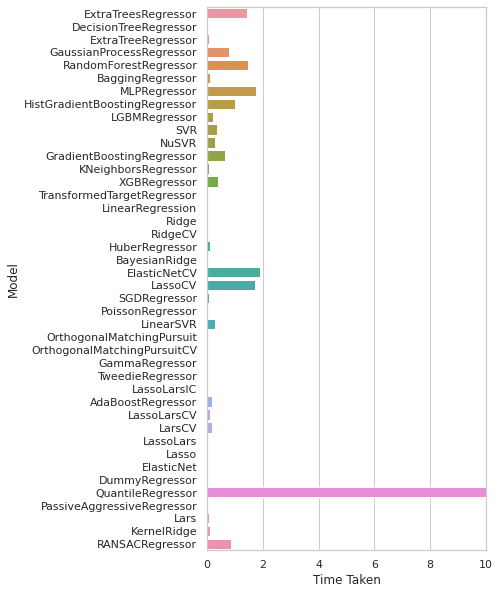

In [62]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))